# **pyspec** example notebook:  2D spectrum

This notebook showcases a basic usage of **pyspec** for computing 2D spectrum and its associated isotropic spectrum. Other featrures such as bin average in log space and confidence limit estimation are also shown.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import seawater as sw

from pyspec import spectrum as spec

# Load random data with $\kappa^{-3}$ spectrum

In [9]:
fni = "data/synthetic_uv.npz"
uv_synthetic = np.load(fni)
up = uv_synthetic['up']

# Compute and plot the 2D spectrum using $dx = dy = 1$

In [10]:
spec2d = spec.TWODimensional_spec(up,1.,1.)

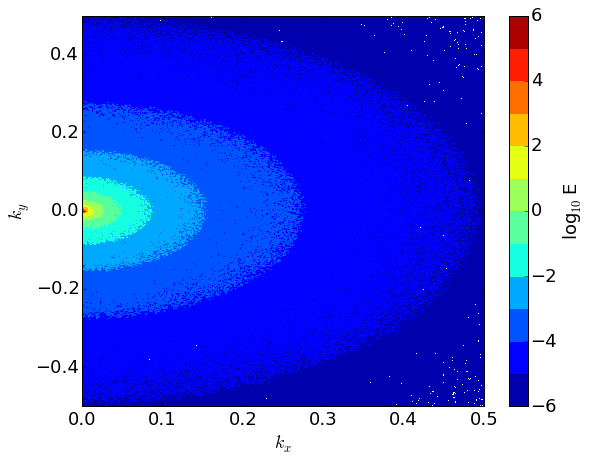

In [41]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ct = np.arange(-6,7,1)
cf = ax.contourf(spec2d.kk1,spec2d.kk2,np.log10(spec2d.spec),ct)
cb   = plt.colorbar(cf)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
cb.set_label(r'log$_{10}$ E')

# Calculating the isotropic spectrum

The class "TWODimensional_spec" has the objects "ispec" for isotropic the spectrum and "kr" for the isotropic wavenumber. The isotropic spectrum is computed by interpolating the 2D spectrum from Cartesian to polar coordinates and integrating in the azimuthal direction; the integration is not very accurate at low wavenumbers due to the paucity of information. An important point is that we neglect the corners ($\kappa > max(k_x,k_y)$) since in this square domain it preferentially selects some direction. Hence, we just need to plot it.

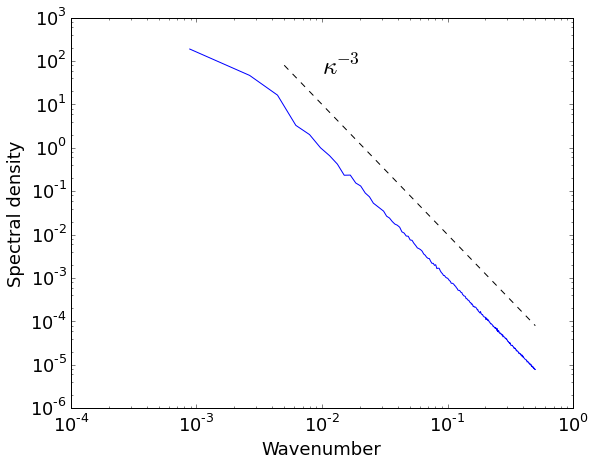

In [90]:
k3 = np.array([.5e-2,.5])
E3 = 1/k3**3/1e5

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
plt.loglog(spec2d.kr,spec2d.ispec)
plt.loglog(k3,E3,'k--')
plt.text(1.e-2,50,r'$\kappa^{-3}$',fontsize=25)
ax.set_xlabel(r"Wavenumber")
ax.set_ylabel(r"Spectral density")

# Averaging with 10 bins decade
Because we generally plot and analyze spectra in $\log_{10}\times\log_{10}$, it is sometimes useful to bin the spectrum. This makes the spectrum uniformaly space in log space. This may be useful for avoinding bias of more data at highwanumber when trying to least-squares fit slopes to the spectrum in log space. The module **spec** has a built in function that does the spectral average. Here we use 10 bins per deca. 

In [52]:
ki, Ei =  spec.avg_per_decade(spec2.kr,spec2.ispec,nbins = 10)

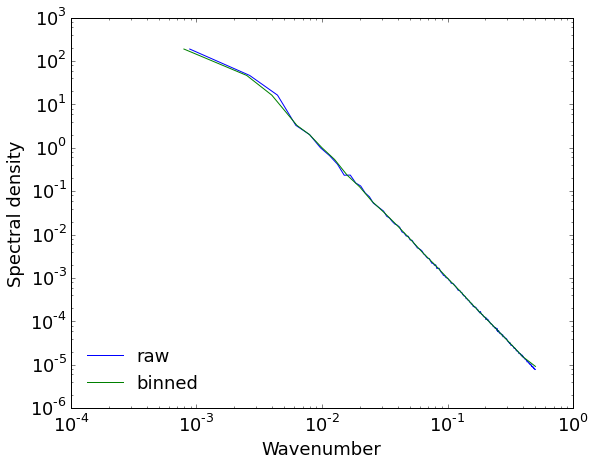

In [76]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
plt.loglog(spec2d.kr,spec2d.ispec,label='raw')
plt.loglog(ki,Ei,label='binned')
ax.set_xlabel(r"Wavenumber")
ax.set_ylabel(r"Spectral density")
plt.legend(loc=3)

# Adding error bars

**pyspec** has a built-in function to calculate confidence limits to the 1D spectrum. The function **spec_error**  calculates these confidence limits assuming that the estimates of the spectrum are $\chi^2$-distributed. Suppose we have estimated the spectra Ei with different number of averaing at different wavenumber. Thus we have different number of spectral realization. To illustrate how to use the function, we pick some arbitrary numbers.

In [77]:
sn  = 5*np.ones(Ei.size) # number of spectral realizations
sn[10:16] = 20
sn[16:] = 100

In [78]:
El,Eu = spec.spec_error(Ei, sn, ci=0.95)   # calculate lower and upper limit of confidence limit

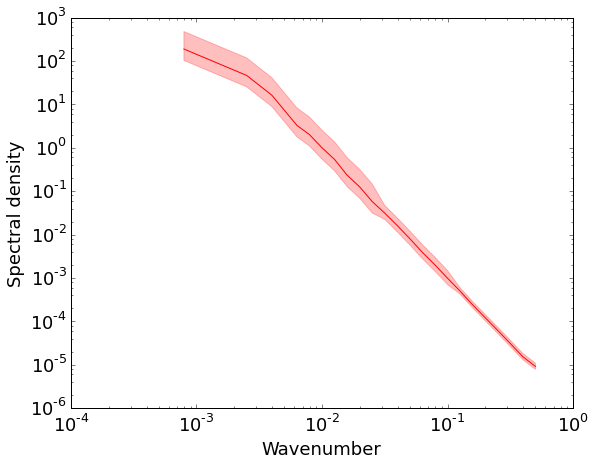

In [79]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.fill_between(ki,El,Eu, color='r', alpha=0.25)
plt.loglog(ki,Ei,color='r')
ax.set_xlabel(r"Wavenumber")
ax.set_ylabel(r"Spectral density")
